In [9]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [11]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [12]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [19]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
survived_count=df.groupby("Survived")["Survived"].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

([<matplotlib.axis.XTick at 0x7c07687bbf10>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

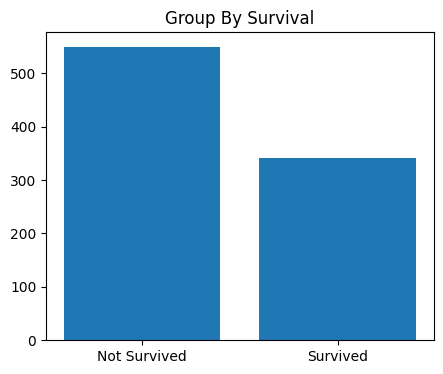

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.bar(survived_count.index,survived_count.values)
plt.title("Group By Survival")
plt.xticks([0,1],["Not Survived","Survived"])

In [25]:
pclass_count=df.groupby("Pclass")["Pclass"].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

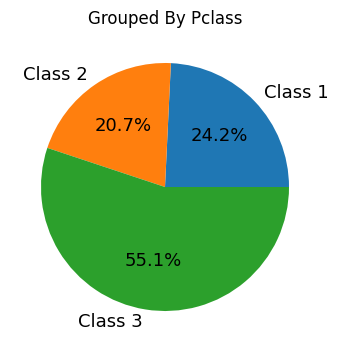

In [28]:
plt.figure(figsize=(4,5))
plt.pie(pclass_count.values,labels=["Class 1","Class 2","Class 3"],autopct='%1.1f%%',textprops={'fontsize':13})
plt.title("Grouped By Pclass")
plt.show()

In [29]:
gender_count=df.groupby("Gender")["Gender"].count()
gender_count

Gender
female    314
male      577
Name: Gender, dtype: int64

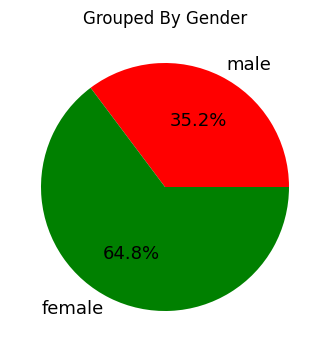

In [33]:
plt.figure(figsize=(4,5))
plt.pie(gender_count.values,labels=["male","female"],autopct='%1.1f%%',textprops={'fontsize':13},colors={'red','green'})
plt.title("Grouped By Gender")
plt.show()

In [34]:
embark_count=df.groupby("Embarked")["Embarked"].count()
embark_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

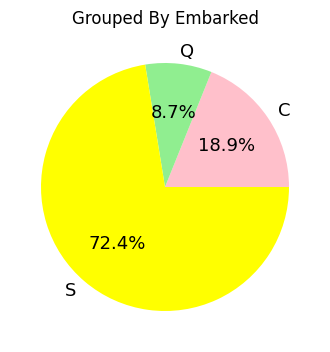

In [40]:
plt.figure(figsize=(4,5))
plt.pie(embark_count.values,labels=['C','Q','S'],autopct='%1.1f%%',textprops={'fontsize':13},colors={'pink','lightGreen','yellow'})
plt.title("Grouped By Embarked")
plt.show()

In [41]:
survived_gender=df.groupby("Gender")["Survived"].sum()
survived_gender

Gender
female    233
male      109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived Gender Male & Female')

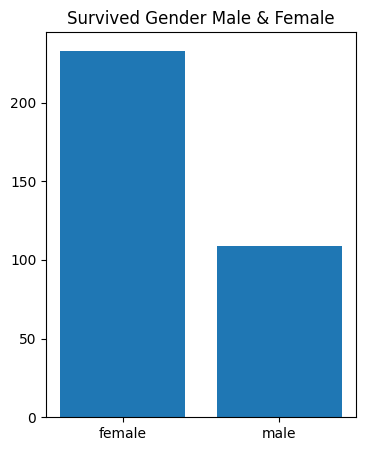

In [48]:
plt.figure(figsize=(4,5))
plt.bar(survived_gender.index,survived_gender.values)
plt.title('Survived Gender Male & Female')


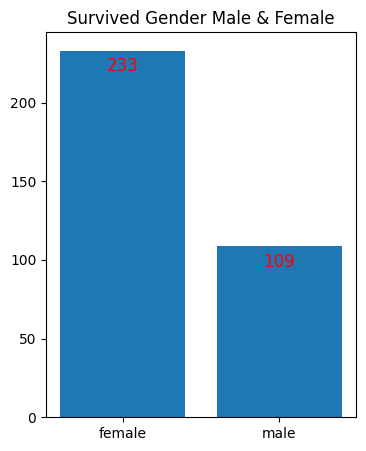

In [46]:
import numpy as np
plt.figure(figsize=(4,5))
plt.bar(survived_gender.index,survived_gender.values)
plt.title('Survived Gender Male & Female')

for i,value in enumerate(survived_gender.values):
  plt.text(i,value-10,str(value),fontsize=12,color="red",horizontalalignment="center",verticalalignment="center")
plt.show()

In [52]:
grouped=df.groupby(["Pclass","Survived","Gender"])
grouped.size()

Pclass  Survived  Gender
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

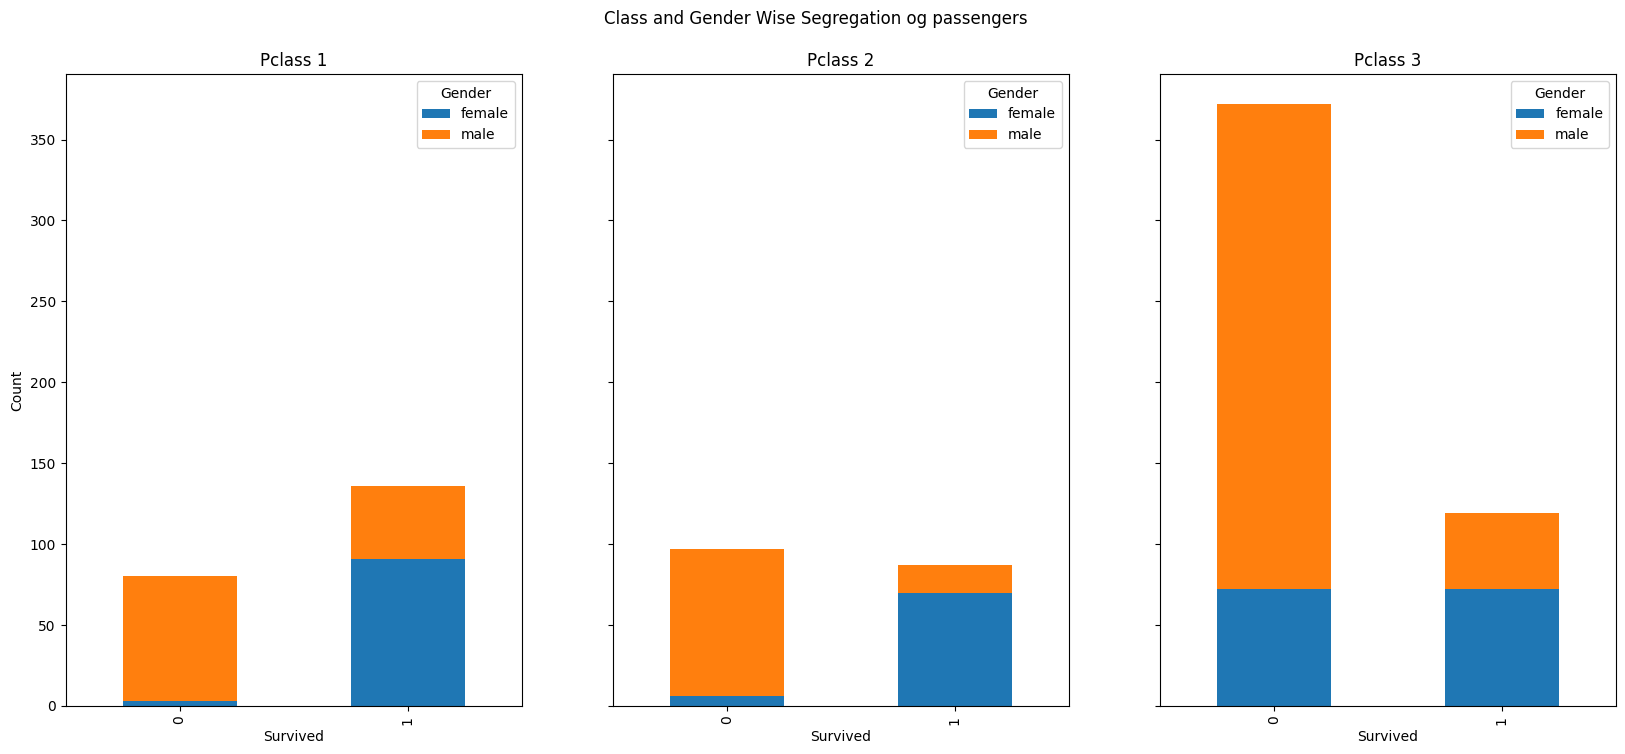

In [64]:
fig,axes = plt.subplots(1,3,figsize=(20,8),sharey=True)
for i,pclass in enumerate([1,2,3]):
  class_data = df[df["Pclass"]==pclass]
  ax=axes[i]
  counts = class_data.groupby(["Survived","Gender"]).size().unstack()
  counts.plot(kind="bar",stacked=True,ax=ax)
  ax.set_title(f"Pclass {pclass}")
  ax.set_xlabel("Survived")
  ax.set_ylabel("Count")

plt.subplots_adjust(top=0.9)
plt.suptitle("Class and Gender Wise Segregation og passengers")
plt.show()